In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from gmm_mi.mi import EstimateMI
from gmm_mi.param_holders import GMMFitParamHolder, SelectComponentsParamHolder, MIDistParamHolder
from gmm_mi.gmm import GMMWithMI as GMM
from gmm_mi.data.synthetic_data import D3 as dataset
from gmm_mi.utils.plotting import plot_gmm_contours, plot_bias_chi2_histogram

In [124]:
def nonlinear_MI_test(correlation_coeff = 0.9,
                      nonlinear_function= lambda x : x + 0.1 * x**2,
                      random_seed = 1,
                      sample_size = 1e4):
    
    cov = [[1.0,correlation_coeff],[correlation_coeff,1.0]]
    MI_analytic = -0.5*np.log(1-correlation_coeff**2)

    np.random.seed(random_seed)
    samples = np.random.multivariate_normal([0.0, 0.0], cov, size=int(sample_size))

    samples[:,1] = nonlinear_function(samples[:,1])

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.scatter(samples[:,0], samples[:,1], label='Input data', alpha=0.2)
    plt.show()
    
    print(f"Ground truth MI = {MI_analytic:.3f}")
    
    gmm_fit_params = GMMFitParamHolder(threshold_fit=1e-6,
                                   reg_covar=1e-12)
    select_components_params = SelectComponentsParamHolder(n_inits=10,
                                                           n_folds=5)
    mi_dist_params = MIDistParamHolder(n_bootstrap=10,
                                       MC_samples=1e4)
    
    mi_estimator = EstimateMI(gmm_fit_params=gmm_fit_params,
                                  select_components_params=select_components_params,
                                  mi_dist_params=mi_dist_params)
    
    MI_mean, MI_std = mi_estimator.fit(samples)  
    
    print(f"Estimated MI   = {MI_mean:.3f} +/- {MI_std:.3f}")
    
    print(f"Error          = {(MI_mean-MI_analytic)/MI_std:.1f} sigma")

    


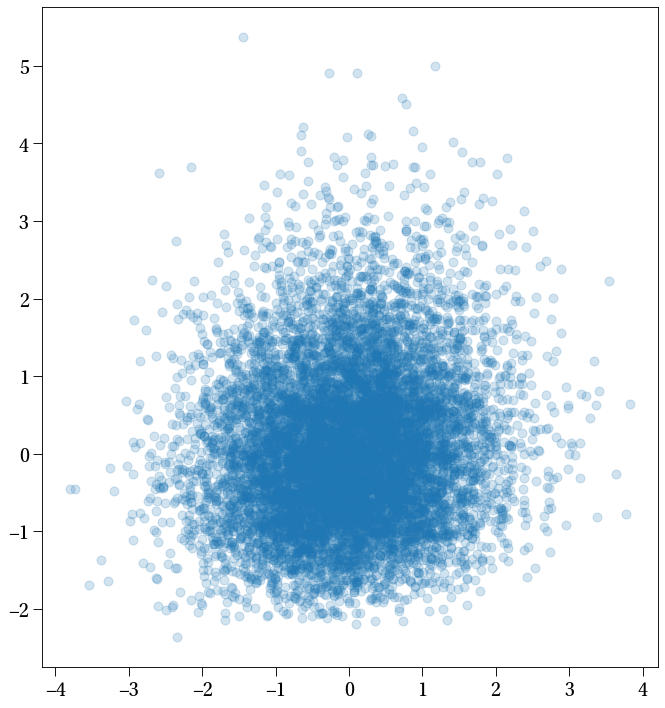

Ground truth MI = 0.005
Estimated MI   = 0.008 +/- 0.001
Error          = 2.3 sigma


In [125]:
nonlinear_MI_test(correlation_coeff = 0.1, sample_size=1e4)

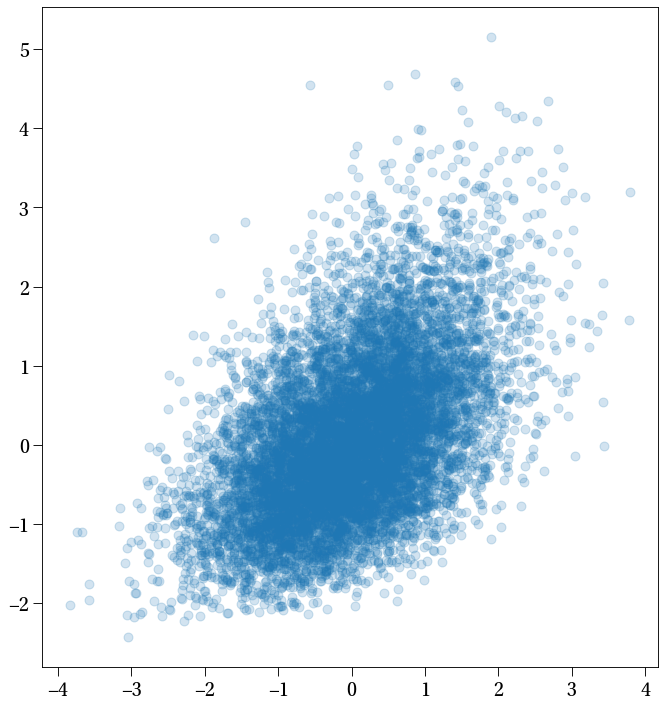

Ground truth MI = 0.144
Estimated MI   = 0.147 +/- 0.007
Error          = 0.4 sigma


In [126]:
nonlinear_MI_test(correlation_coeff = 0.5, sample_size=1e4)

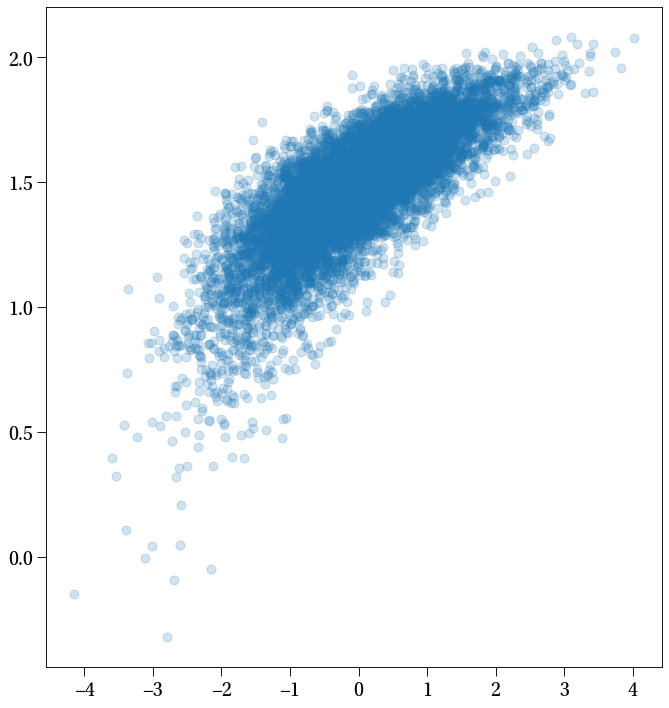

Ground truth MI = 0.511
Estimated MI   = 0.512 +/- 0.007
Error          = 0.2 sigma


In [127]:
nonlinear_MI_test(correlation_coeff = 0.8, sample_size=1e4, 
                  nonlinear_function= lambda x : np.log(x+4.5),
                 random_seed=2)

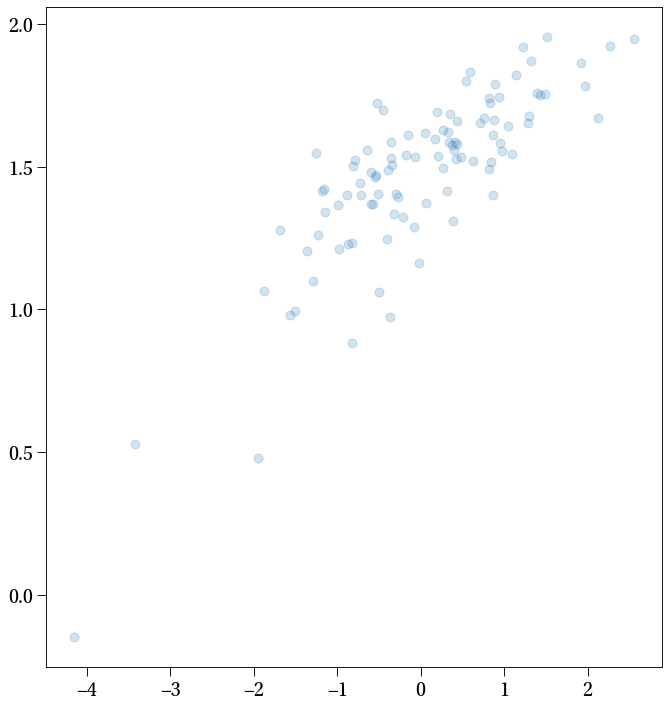

Ground truth MI = 0.511
Estimated MI   = 0.633 +/- 0.070
Error          = 1.7 sigma


In [128]:
nonlinear_MI_test(correlation_coeff = 0.8, sample_size=1e2, 
                  nonlinear_function= lambda x : np.log(x+4.5),
                 random_seed=2)

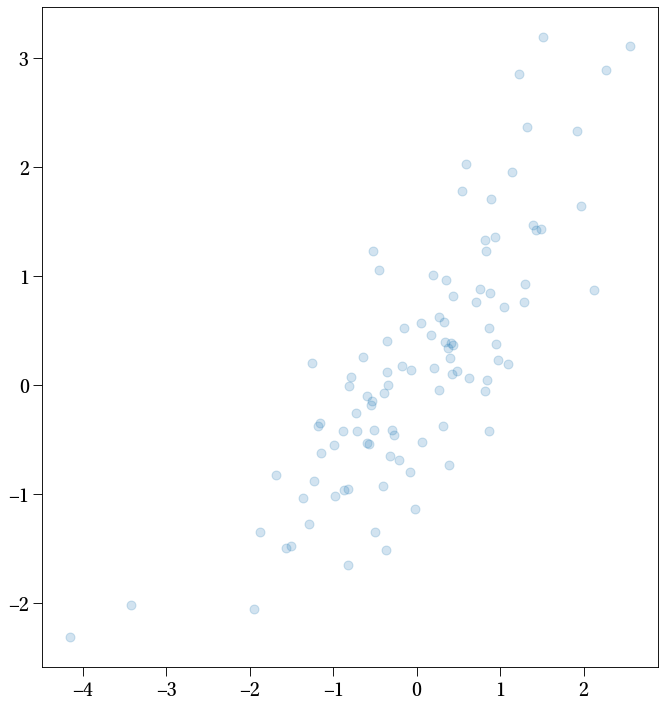

Ground truth MI = 0.511
Estimated MI   = 0.534 +/- 0.036
Error          = 0.6 sigma


In [129]:
nonlinear_MI_test(correlation_coeff = 0.8, sample_size=1e2, 
                 random_seed=2)

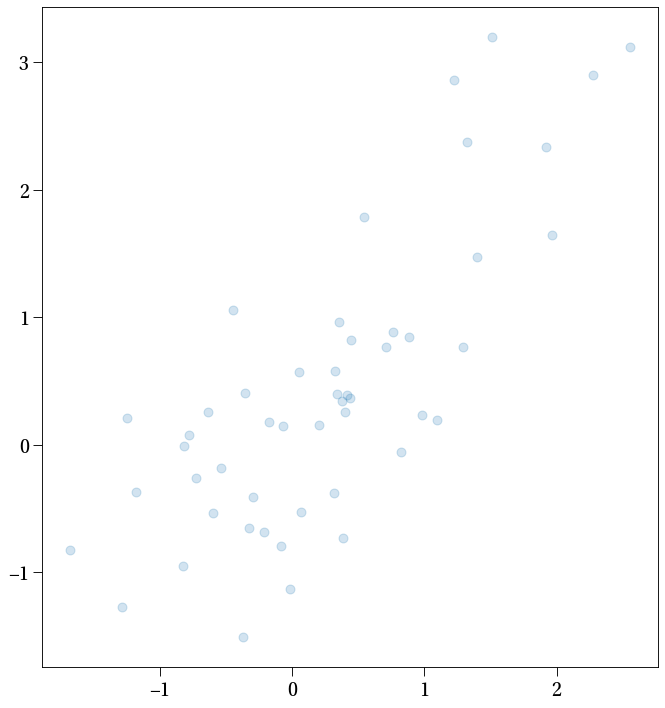

Ground truth MI = 0.511
Estimated MI   = 0.458 +/- 0.074
Error          = -0.7 sigma


In [132]:
nonlinear_MI_test(correlation_coeff = 0.8, sample_size=50, 
                 random_seed=2)

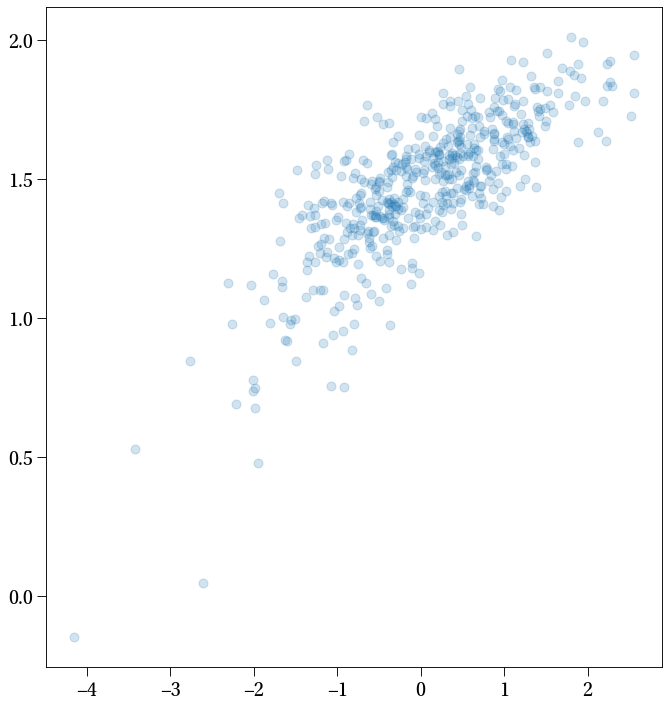

Ground truth MI = 0.511
Estimated MI   = 0.537 +/- 0.037
Error          = 0.7 sigma


In [136]:
nonlinear_MI_test(correlation_coeff = 0.8, sample_size=500, 
                  nonlinear_function= lambda x : np.log(x+4.5),
                 random_seed=2)